In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/UntitledFolder/FertilizerPrediction.csv')

In [ ]:
X = data[['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous']]
y = data['Fertilizer Name']

In [ ]:
X = pd.get_dummies(X, columns=['Soil Type', 'Crop Type'], drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42)
}

In [ ]:
metrics_list = {}

In [ ]:
for name, model in models.items():
    print(f"\n========== {name} ==========")

    if name in ['Support Vector Machine', 'Logistic Regression', 'K-Nearest Neighbors']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    metrics_list[name] = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1}

    print(f"Accuracy     : {acc * 100:.2f}%")
    print(f"Precision    : {prec * 100:.2f}%")
    print(f"Recall       : {rec * 100:.2f}%")
    print(f"F1 Score     : {f1 * 100:.2f}%")
    print(f"Confusion Matrix:\n{cm}")



========== Random Forest ==========
Accuracy     : 95.00%
Precision    : 100.00%
Recall       : 95.00%
F1 Score     : 96.67%
Confusion Matrix:
[[1 0 1 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 0 0 5 0]
 [0 0 0 0 0 0 6]]

========== Decision Tree ==========
Accuracy     : 100.00%
Precision    : 100.00%
Recall       : 100.00%
F1 Score     : 100.00%
Confusion Matrix:
[[2 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 5 0 0]
 [0 0 0 0 5 0]
 [0 0 0 0 0 6]]

========== Support Vector Machine ==========
Accuracy     : 100.00%
Precision    : 100.00%
Recall       : 100.00%
F1 Score     : 100.00%
Confusion Matrix:
[[2 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 5 0 0]
 [0 0 0 0 5 0]
 [0 0 0 0 0 6]]

========== K-Nearest Neighbors ==========
Accuracy     : 15.00%
Precision    : 43.33%
Recall       : 15.00%
F1 Score     : 19.82%
Confusion Matrix:
[[0 1 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 2 0 1 1 1 0]
 [0 1 0 1 2 1 0]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


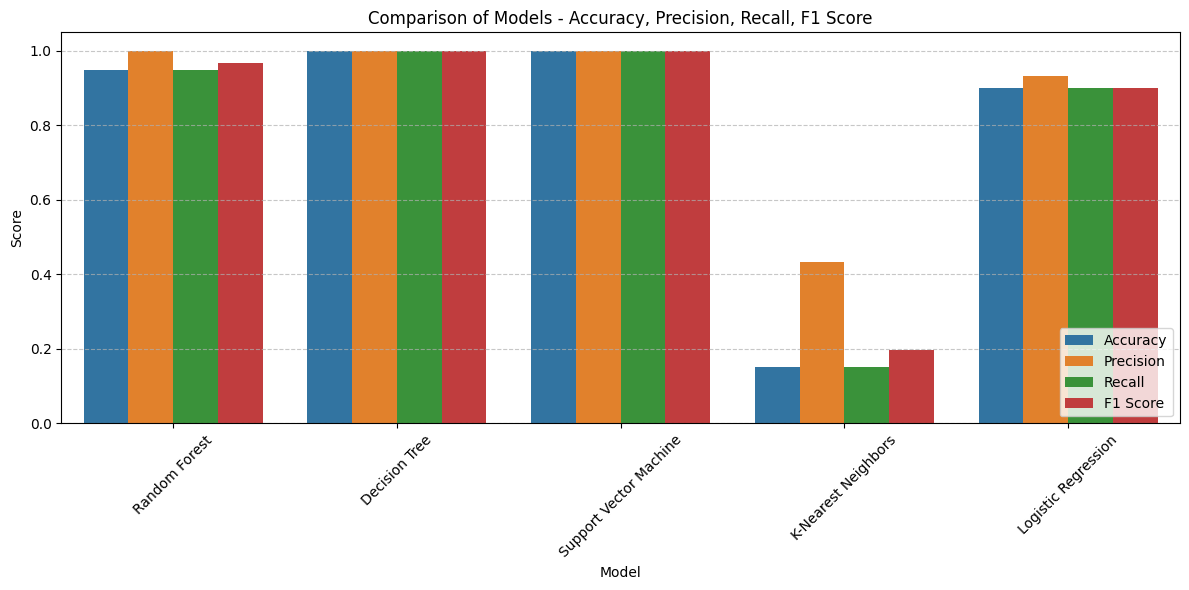

In [ ]:
# Convert metrics_list to DataFrame for plotting
metrics_df = pd.DataFrame(metrics_list).T.reset_index()
metrics_df = metrics_df.rename(columns={'index': 'Model'})

# Plot the metrics
plt.figure(figsize=(12, 6))
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_melted)
plt.title('Comparison of Models - Accuracy, Precision, Recall, F1 Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
def predict_all_models(temperature, humidity, moisture, soil_type, crop_type, nitrogen, potassium, phosphorous):
    input_data = pd.DataFrame([[temperature, humidity, moisture, soil_type, crop_type, nitrogen, potassium, phosphorous]],
                              columns=['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous'])
    input_data = pd.get_dummies(input_data, columns=['Soil Type', 'Crop Type'], drop_first=True)

    for col in X_train.columns:
        if col not in input_data.columns:
            input_data[col] = 0
    input_data = input_data[X_train.columns]

    predictions = {}

    for name, model in models.items():
        if name in ['Support Vector Machine', 'Logistic Regression', 'K-Nearest Neighbors']:
            input_scaled = scaler.transform(input_data)
            prediction = model.predict(input_scaled)
        else:
            prediction = model.predict(input_data)
        predictions[name] = prediction[0]

    return predictions

In [ ]:
print("\n💡 Enter soil and crop parameters for prediction:")
t = float(input('Enter temperature: '))
h = float(input('Enter humidity: '))
m = float(input('Enter moisture: '))
s = input('Enter soil type: ')
c = input('Enter crop type: ')
n = float(input('Enter nitrogen: '))
k = float(input('Enter potassium: '))
p = float(input('Enter phosphorus: '))

# Show predictions from all models
results = predict_all_models(t, h, m, s, c, n, k, p)
print("\n🌱 Fertilizer Predictions by Model:")
for model_name, prediction in results.items():
    print(f"{model_name}: {prediction}")


💡 Enter soil and crop parameters for prediction:
Enter temperature: 29
Enter humidity: 52
Enter moisture: 45
Enter soil type: loamy
Enter crop type: sugarcane
Enter nitrogen: 12
Enter potassium: 0
Enter phosphorus: 36

🌱 Fertilizer Predictions by Model:
Random Forest: DAP
Decision Tree: DAP
Support Vector Machine: DAP
K-Nearest Neighbors: 28-28
Logistic Regression: DAP
